<a href="https://colab.research.google.com/github/ollihansen90/Mathe-SH/blob/main/MarkovKetten_Wetter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2023-06-21 16:33:18--  https://github.com/ollihansen90/Mathe-SH/raw/main/data/data.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ollihansen90/Mathe-SH/main/data/data.npy [following]
--2023-06-21 16:33:18--  https://raw.githubusercontent.com/ollihansen90/Mathe-SH/main/data/data.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51264 (50K) [application/octet-stream]
Saving to: ‘data.npy’

data.npy            100%[===================>]  50.06K  --.-KB/s    in 0.002s  

2023-06-21 16:33:19 (25.7 MB/s) - ‘data.npy’ saved [51264/51264]

(12784,)


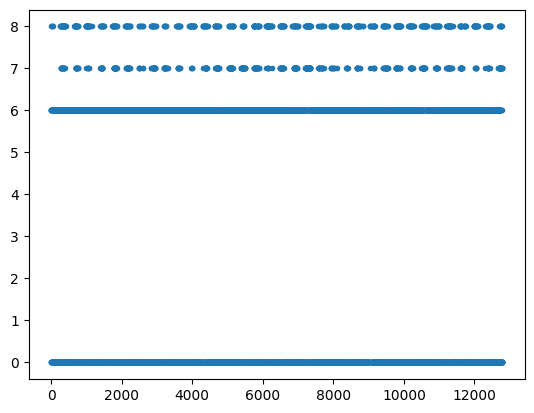

In [ ]:
!wget -nc https://github.com/ollihansen90/Mathe-SH/raw/main/data/data.npy
import numpy as np
import matplotlib.pyplot as plt

data = np.load("data.npy")
# 0: Sonne
# 6: Regen
# 7: Schnee
# 8: Schneeregen
# 00: Sonne -> Sonne

print(data.shape)
plt.figure()
plt.plot(data, ".")
plt.show()

In [ ]:
wetterdict = dict()
zuordnung = {
    "0": "Sonne",
    "6": "Regen",
    "7": "Schnee",
    "8": "Schneeregen"
}

folge = [0,0,0,8,7]
folge = data

def dictupdate(dictionary, key, value):
    if key in dictionary.keys():
        if value in dictionary[key].keys():
            dictionary[key][value] += 1
        else:
            dictionary[key][value] = 1
    else:
        dictionary[key] = dict()
        dictionary[key][value] = 1
    return dictionary

for i in range(len(folge)-1):
    hier = folge[i]
    nachbar = folge[i+1]
    wetterdict = dictupdate(wetterdict, hier, nachbar)

    #print(wetterdict)
#wetterdict[0] = dict()
#wetterdict[0][0] = 1
#wetterdict[0][8] = 1
print(wetterdict)

{0: {0: 3085, 6: 1536, 8: 127, 7: 149}, 6: {0: 1511, 6: 4546, 8: 276, 7: 63}, 8: {8: 265, 6: 260, 0: 119, 7: 129}, 7: {8: 105, 7: 376, 0: 182, 6: 54}}


In [ ]:
wetterprobs = dict()

for heute in wetterdict.keys():

    wetterprobs[heute] = wetterdict[heute]
    summe = 0
    for wetter in wetterprobs[heute].keys():
        summe += wetterprobs[heute][wetter]

    for wetter in wetterprobs[heute].keys():
        wetterprobs[heute][wetter] /= summe

print(wetterprobs)

{0: {0: 0.6299775372677149, 6: 0.31366142536246683, 8: 0.02593424545640188, 7: 0.03042679191341638}, 6: {0: 0.2362414008755472, 6: 0.7107567229518449, 8: 0.043151969981238276, 7: 0.009849906191369606}, 8: {8: 0.3428201811125485, 6: 0.33635187580853815, 0: 0.1539456662354463, 7: 0.16688227684346701}, 7: {8: 0.14644351464435146, 7: 0.5244072524407253, 0: 0.25383542538354253, 6: 0.07531380753138076}}


In [ ]:
wettervert = dict()
keylist = [0,6,7,8]

for schluessel in keylist:
    wettervert[schluessel] = wetterprobs[schluessel]
    cumsum = 0
    for key in keylist:
        cumsum += wettervert[schluessel][key]
        wettervert[schluessel][key] = cumsum

print(wettervert)
print(wetterprobs)

{0: {0: 0.6299775372677149, 6: 0.9436389626301818, 8: 1.0, 7: 0.9740657545435981}, 6: {0: 0.2362414008755472, 6: 0.9469981238273921, 8: 1.0, 7: 0.9568480300187617}, 7: {8: 1.0, 7: 0.8535564853556485, 0: 0.25383542538354253, 6: 0.32914923291492326}, 8: {8: 1.0, 6: 0.49029754204398446, 0: 0.1539456662354463, 7: 0.6571798188874515}}
{0: {0: 0.6299775372677149, 6: 0.9436389626301818, 8: 1.0, 7: 0.9740657545435981}, 6: {0: 0.2362414008755472, 6: 0.9469981238273921, 8: 1.0, 7: 0.9568480300187617}, 8: {8: 1.0, 6: 0.49029754204398446, 0: 0.1539456662354463, 7: 0.6571798188874515}, 7: {8: 1.0, 7: 0.8535564853556485, 0: 0.25383542538354253, 6: 0.32914923291492326}}


In [ ]:
# Monte-Carlo-Simulation
# "Wahrscheinlichkeitsgewichteter Pfad durch einen Phasenraum"
# "Phasenraum": Menge der Zustände, hier ("Sonne", "Regen", "Schnee", "Schneeregen")
import random

z = random.random()

liste = [0, 0.1, 0.7, 0.8, 0.81, 0.9, 1]
print(z)
def finde_index(liste, wert):
    idx = 0
    while wert>liste[idx]:
        idx += 1
    return idx

def finde_index(liste, wert):
    for i in range(len(liste)):
        wert2 = liste[i]
        if wert2 > wert:
            idx = i
            break
    return idx
idx = finde_index(liste, 0.85)
print(idx) # 5

0.9660376587408677
5


In [ ]:
jetzt = 0
vorhersagen = []

emojiwetter = {
    "0": "\u2600",
    "6": "\U00002614",
    "7": "\u2744",
    "8": "\u26C4"
}
print("\U00002614")

for tag in range(10):
    morgenvert = wettervert[jetzt]
    phasen = [0,6,7,8]
    vert = []
    for i in phasen:
        vert.append(morgenvert[i])
    z = random.random()
    morgen = finde_index(vert, z)
    vorhersagen.append(emojiwetter[str(phasen[morgen])])
    jetzt = phasen[morgen]

print(" -> ".join(vorhersagen))


☔
☀ -> ☀ -> ☔ -> ☔ -> ☀ -> ☀ -> ☀ -> ☀ -> ☀ -> ☔
